In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Cтационарный ряд

In [2]:
series = pd.read_csv("../../015 Временные ряды, общая теория/Series/daily-total-female-births-in-cal.csv")['Count']

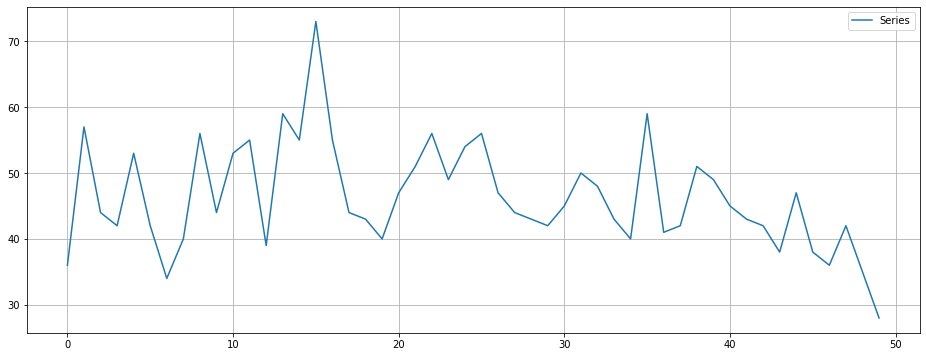

In [3]:
series_period = series[250:300]
series_index = range(len(series_period))

plt.figure(figsize=(16, 6))
_ = plt.plot(series_index, series_period, label='Series')
plt.grid()
_ = plt.legend()

In [4]:
def MA(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series()
    return series.rolling(n).mean()

def WMA(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

def EMA(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

def MSE():
    predictions, MSE = {}, {}
    for n in np.linspace(3,20,10,dtype=int):
        predictions[f"MA {n}"] = MA(series, n)
    for weight in weight_array:
        predictions[f"WMA {weight}"] = WMA(series, 3, weight)
    for alpha in np.linspace(0.01,0.99,9,dtype=float):
        predictions[f"EMA {alpha}"] = EMA(series, alpha)
    for key,value in predictions.items():
        MSE[key] = round(np.sum(np.square(value-series)), 2)
    
    return sorted(MSE.items(),key=lambda x: x[1])

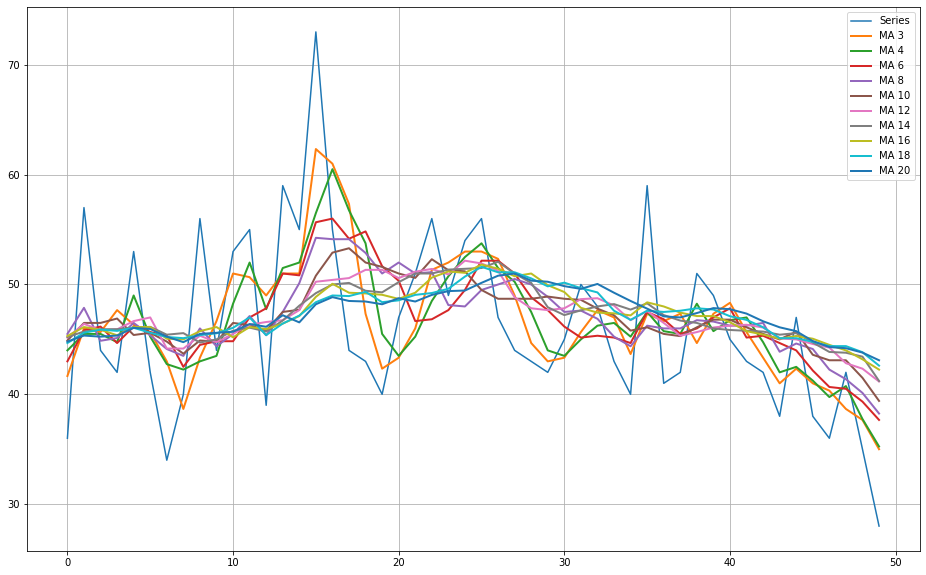

In [5]:
plt.figure(figsize=(16, 10))
_ = plt.plot(series_index, series_period, label='Series')
for n in np.linspace(3,20,10,dtype=int):
    ma = MA(series, n)
    ma_period = ma[250:300]
    ma_index = range(len(ma_period))
    _ = plt.plot(ma_index, ma_period, linewidth='2', label=f"MA {n}")
_ = plt.legend()
_ = plt.grid()

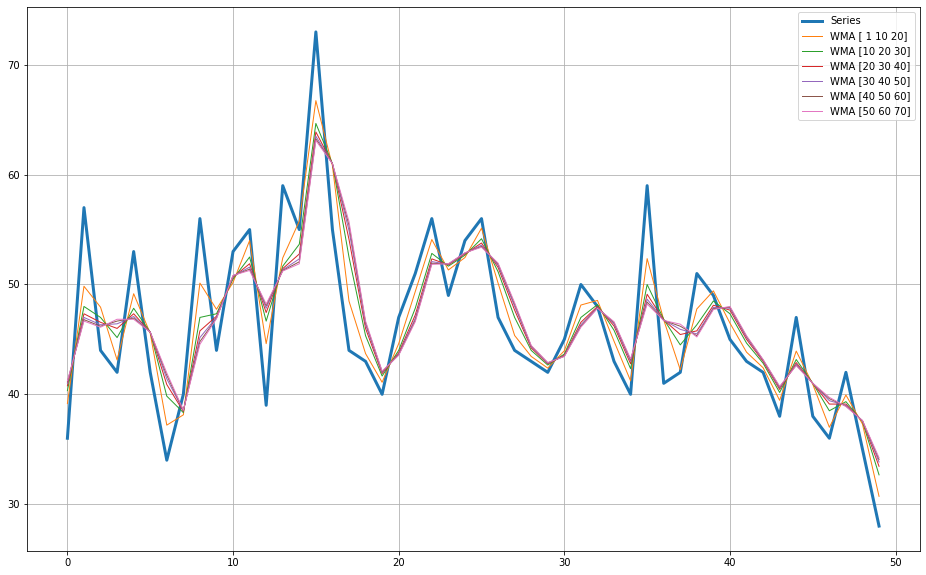

In [6]:
weight_array = [np.linspace(1,20,3,dtype=int),np.linspace(10,30,3,dtype=int),np.linspace(20,40,3,dtype=int),
             np.linspace(30,50,3,dtype=int),np.linspace(40,60,3,dtype=int), np.linspace(50,70,3,dtype=int)]

plt.figure(figsize=(16, 10))
_ = plt.plot(series_index, series_period, linewidth='3', label='Series')
for weight in weight_array:
    wma = WMA(series, 3, weight)
    wma_period = wma[250:300]
    wma_index = range(len(wma_period))
    _ = plt.plot(wma_index, wma_period, linewidth='1', label=f"WMA {weight}")
_ = plt.legend()
_ = plt.grid()

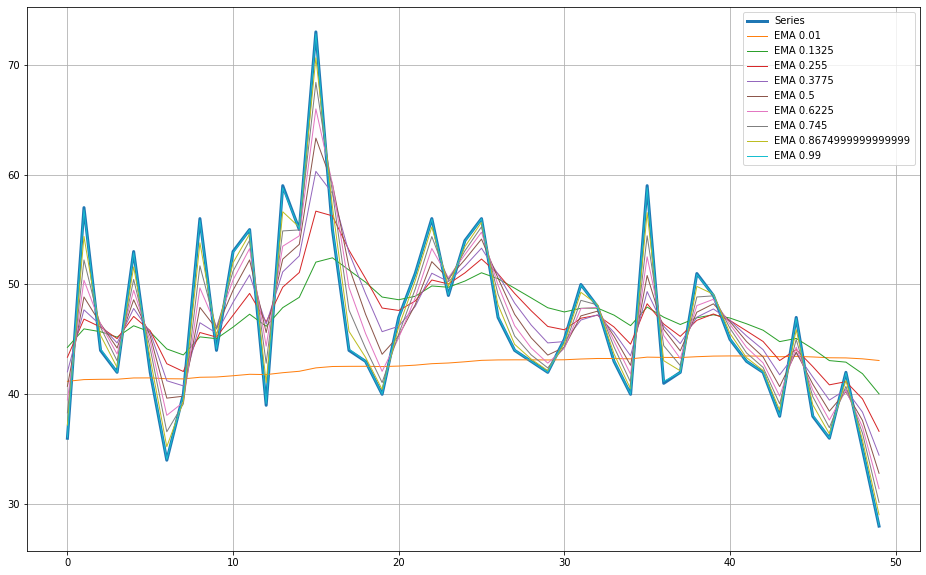

In [7]:
plt.figure(figsize=(16, 10))
_ = plt.plot(series_index, series_period, linewidth='3', label='Series')
for alpha in np.linspace(0.01,0.99,9,dtype=float):
    ema = EMA(series, alpha)
    ema_period = ema[250:300]
    ema_index = range(len(ema_period))
    _ = plt.plot(ema_index, ema_period, linewidth='1', label=f"EMA {alpha}")
_ = plt.legend()
_ = plt.grid()

In [8]:
MSE()

[('EMA 0.99', 3.04),
 ('EMA 0.8674999999999999', 480.41),
 ('EMA 0.745', 1624.5),
 ('EMA 0.6225', 3286.91),
 ('WMA [ 1 10 20]', 3566.14),
 ('EMA 0.5', 5374.26),
 ('WMA [10 20 30]', 6149.39),
 ('WMA [20 30 40]', 7470.47),
 ('EMA 0.3775', 7830.55),
 ('WMA [30 40 50]', 8207.21),
 ('WMA [40 50 60]', 8673.64),
 ('WMA [50 60 70]', 8994.75),
 ('EMA 0.255', 10645.69),
 ('MA 3', 10722.22),
 ('MA 4', 12498.31),
 ('EMA 0.1325', 13890.41),
 ('MA 6', 14207.94),
 ('MA 8', 14533.55),
 ('MA 10', 15124.87),
 ('MA 12', 15718.79),
 ('MA 16', 15966.66),
 ('MA 14', 16049.43),
 ('MA 18', 16102.81),
 ('MA 20', 16184.2),
 ('EMA 0.01', 19818.07)]

### Нестационарный ряд

In [9]:
series = pd.read_csv("../../015 Временные ряды, общая теория/Series/international-airline-passengers.csv")['Count']

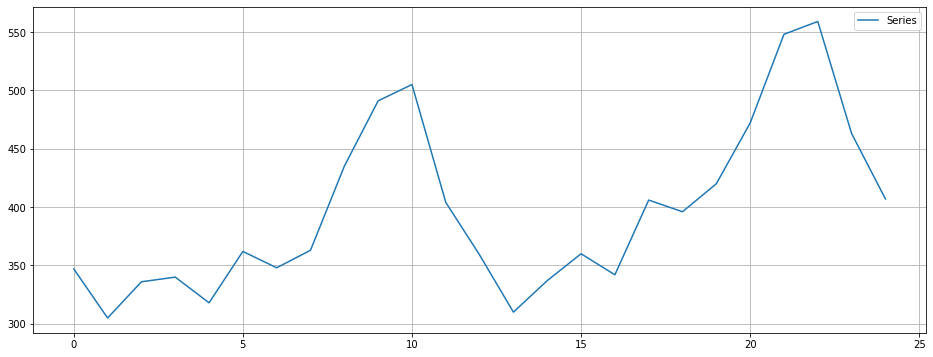

In [10]:
series_period = series[105:130]
series_index = range(len(series_period))

plt.figure(figsize=(16, 6))
_ = plt.plot(series_index, series_period, label='Series')
plt.grid()
_ = plt.legend()

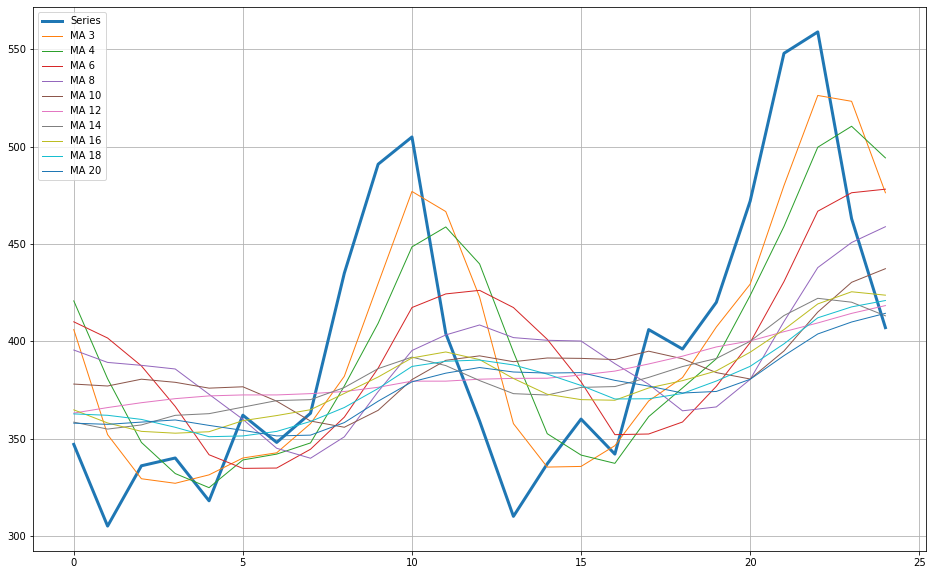

In [11]:
plt.figure(figsize=(16, 10))
_ = plt.plot(series_index, series_period, linewidth='3', label='Series')
for n in np.linspace(3,20,10,dtype=int):
    ma = MA(series, n)
    ma_period = ma[105:130]
    ma_index = range(len(ma_period))
    _ = plt.plot(ma_index, ma_period, linewidth='1', label=f"MA {n}")
_ = plt.legend()
_ = plt.grid()

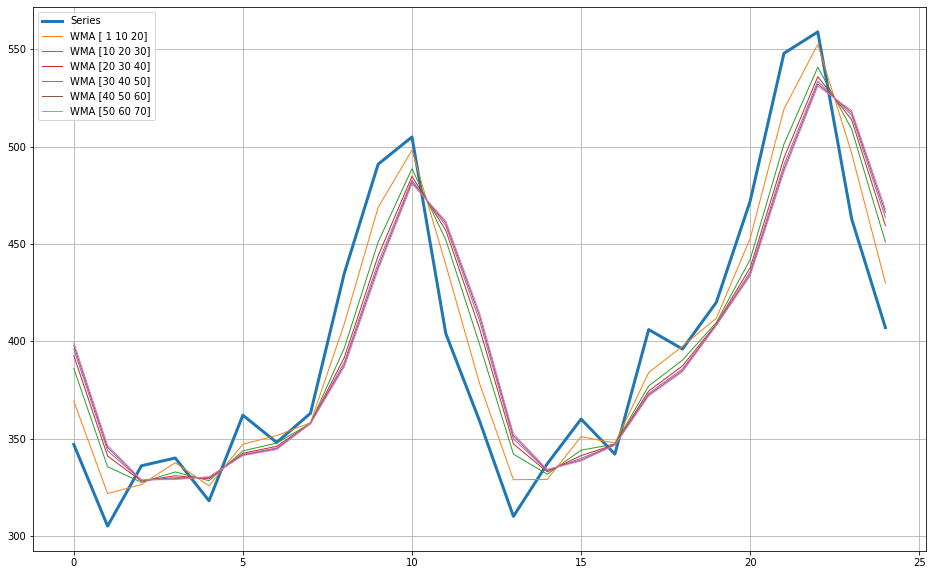

In [12]:
weight_array = [np.linspace(1,20,3,dtype=int),np.linspace(10,30,3,dtype=int),np.linspace(20,40,3,dtype=int),
             np.linspace(30,50,3,dtype=int),np.linspace(40,60,3,dtype=int), np.linspace(50,70,3,dtype=int)]

plt.figure(figsize=(16, 10))
_ = plt.plot(series_index, series_period, linewidth='3', label='Series')
for weight in weight_array:
    wma = WMA(series, 3, weight)
    wma_period = wma[105:130]
    wma_index = range(len(wma_period))
    _ = plt.plot(wma_index, wma_period, linewidth='1', label=f"WMA {weight}")
_ = plt.legend()
_ = plt.grid()

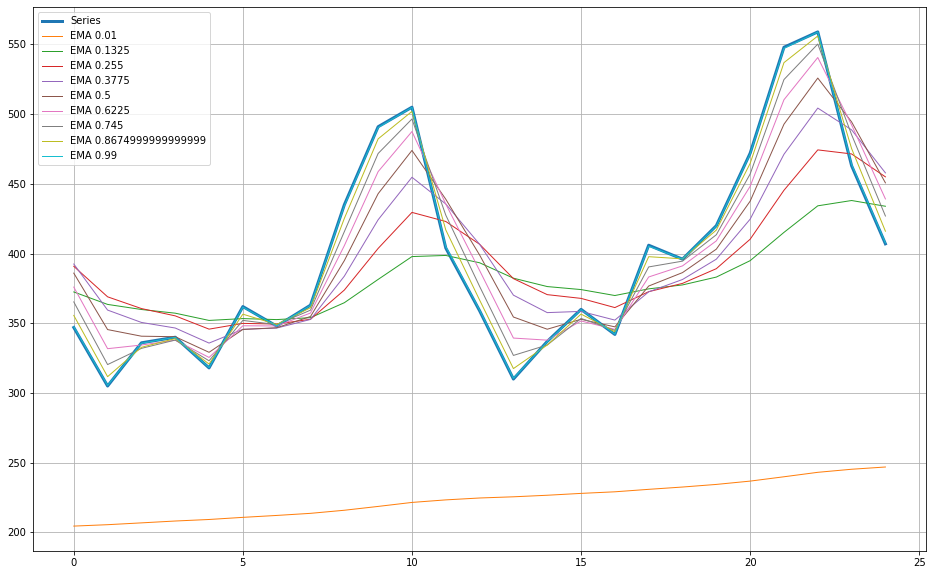

In [13]:
plt.figure(figsize=(16, 10))
_ = plt.plot(series_index, series_period, linewidth='3', label='Series')
for alpha in np.linspace(0.01,0.99,9,dtype=float):
    ema = EMA(series, alpha)
    ema_period = ema[105:130]
    ema_index = range(len(ema_period))
    _ = plt.plot(ema_index, ema_period, linewidth='1', label=f"EMA {alpha}")
_ = plt.legend()
_ = plt.grid()

In [14]:
MSE()

[('EMA 0.99', 16.35),
 ('EMA 0.8674999999999999', 3124.95),
 ('EMA 0.745', 12798.2),
 ('WMA [ 1 10 20]', 21759.45),
 ('EMA 0.6225', 31420.47),
 ('WMA [10 20 30]', 53350.67),
 ('EMA 0.5', 62273.92),
 ('WMA [20 30 40]', 70332.1),
 ('WMA [30 40 50]', 79800.67),
 ('WMA [40 50 60]', 85794.72),
 ('WMA [50 60 70]', 89921.14),
 ('EMA 0.3775', 108886.17),
 ('MA 3', 112117.78),
 ('EMA 0.255', 173317.12),
 ('MA 4', 185562.19),
 ('MA 14', 265974.53),
 ('EMA 0.1325', 269178.01),
 ('MA 16', 289756.39),
 ('MA 6', 290751.44),
 ('MA 12', 306550.02),
 ('MA 18', 335054.58),
 ('MA 8', 338501.61),
 ('MA 10', 348461.42),
 ('MA 20', 374395.58),
 ('EMA 0.01', 2666436.1)]